In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [2]:
accidents_list = ["Data/Road Safety Data - Accidents 2019.csv", "Data/dftRoadSafetyData_Accidents_2018.csv", 
                  "Data/dftRoadSafetyData_Accidents_2017.csv", "Data/dftRoadSafety_Accidents_2016.csv", 
                  "Data/Accidents_2015.csv"] 
accidents = pd.concat((pd.read_csv(f, low_memory=False) for f in accidents_list))

In [3]:
vehicles_list = ["Data/Road Safety Data- Vehicles 2019.csv", "Data/dftRoadSafetyData_Vehicles_2018.csv", 
                 "Data/dftRoadSafetyData_Vehicles_2017.csv", "Data/dftRoadSafetyData_Vehicles_2016.csv", 
                 "Data/Vehicles_2015.csv"]
vehicles = pd.concat((pd.read_csv(f, low_memory=False) for f in vehicles_list))

In [4]:
casualties_list = ["Data/Road Safety Data - Casualties 2019.csv", "Data/dftRoadSafetyData_Casualties_2018.csv", 
                   "Data/dftRoadSafetyData_Casualties_2017.csv", "Data/dftRoadSafetyData_Casualties_2016.csv", 
                   "Data/Casualties_2015.csv"]
casualties = pd.concat((pd.read_csv(f, low_memory=False) for f in casualties_list))

In [5]:
print(accidents.duplicated().any())
print(vehicles.duplicated().any())
print(casualties.duplicated().any())

False
False
False


In [6]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 646830 entries, 0 to 140055
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               646830 non-null  object 
 1   Location_Easting_OSGR                        646694 non-null  float64
 2   Location_Northing_OSGR                       646694 non-null  float64
 3   Longitude                                    646684 non-null  float64
 4   Latitude                                     646684 non-null  float64
 5   Police_Force                                 646830 non-null  int64  
 6   Accident_Severity                            646830 non-null  int64  
 7   Number_of_Vehicles                           646830 non-null  int64  
 8   Number_of_Casualties                         646830 non-null  int64  
 9   Date                                         646830 non-nul

In [7]:
# Filters casualties by casualty class = 'driver or rider' and casualty type = 'cyclist'
cyclist_casualties = casualties.loc[(casualties['Casualty_Class'] == 1) & (casualties['Casualty_Type'] == 1)].copy()

In [8]:
# Filters accidents by those where one of the casualties was a cyclist
indices = cyclist_casualties.loc[:,'Accident_Index']
cyclist_accidents = accidents.loc[accidents['Accident_Index'].isin(indices)].copy()

In [9]:
cyclist_accidents = cyclist_accidents.drop(columns=['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
                                                   'Latitude', 'Local_Authority_(District)', 
                                                   'Local_Authority_(Highway)', '1st_Road_Number', '2nd_Road_Number',
                                                    'Pedestrian_Crossing-Human_Control',
                                                    'Pedestrian_Crossing-Physical_Facilities',
                                                    'Did_Police_Officer_Attend_Scene_of_Accident', 'LSOA_of_Accident_Location'])

In [10]:
# Bins date column into years and months and time column into hours
dates = pd.to_datetime(cyclist_accidents['Date'], format='%d/%m/%Y')
cyclist_accidents['Month'] = dates.dt.month
cyclist_accidents['Year'] = dates.dt.year

times = pd.to_datetime(cyclist_accidents['Time'], format='%H:%M')
cyclist_accidents['Hour'] = times.dt.hour

In [11]:
# Gets frequency data for all variables
cols_list = ['Police_Force', 'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties','Month', 'Year', 'Day_of_Week',
              'Hour', '1st_Road_Class', 'Road_Type', 'Speed_limit', 'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
              'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 'Special_Conditions_at_Site',
              'Carriageway_Hazards', 'Urban_or_Rural_Area']
x_list = []
y_list = []

for x in cols_list:
    counts = cyclist_accidents[x].value_counts().reset_index()
    x_list.append(counts['index'])
    y_list.append(counts[x])

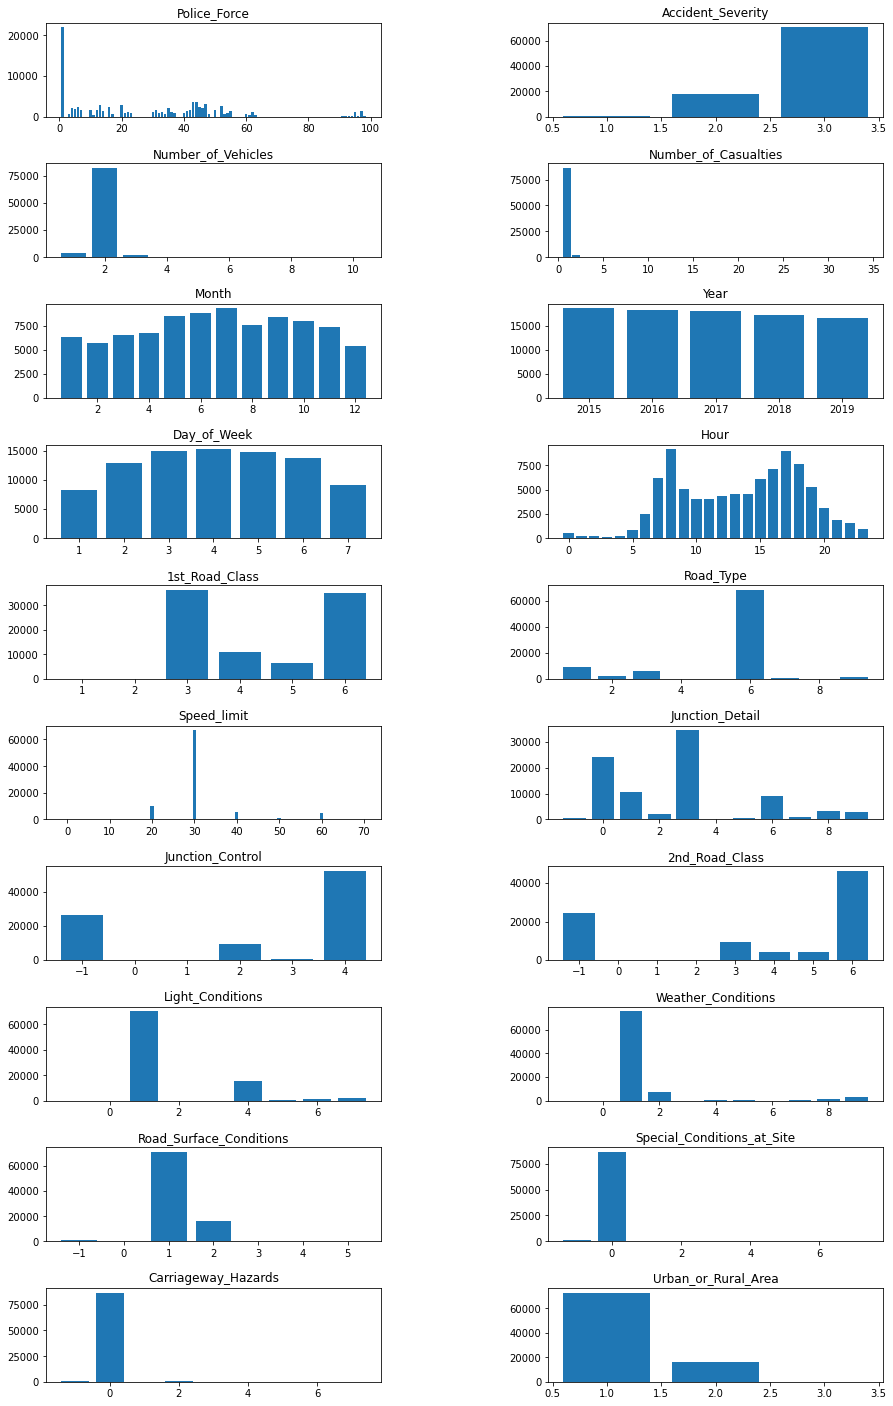

In [12]:
# Displays bar plots for variables
fig, axs = plt.subplots(10,2, figsize=(15,25))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
axs = axs.ravel()

for i in range(20):
    axs[i].bar(x_list[i], y_list[i])
    axs[i].set_title(cols_list[i])

In [23]:
# Gets frequency data for stacked bar charts
cols_tab = ['Number_of_Vehicles', 'Number_of_Casualties','Month', 'Year', 'Day_of_Week',
              'Hour', '1st_Road_Class', 'Road_Type', 'Speed_limit', 'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
              'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area']
tab_list = []

for x in cols_tab:
    tab = pd.crosstab(cyclist_accidents[x], cyclist_accidents['Accident_Severity'], normalize='index')
    tab = tab[[3, 2, 1]].copy()
    tab_list.append(tab)

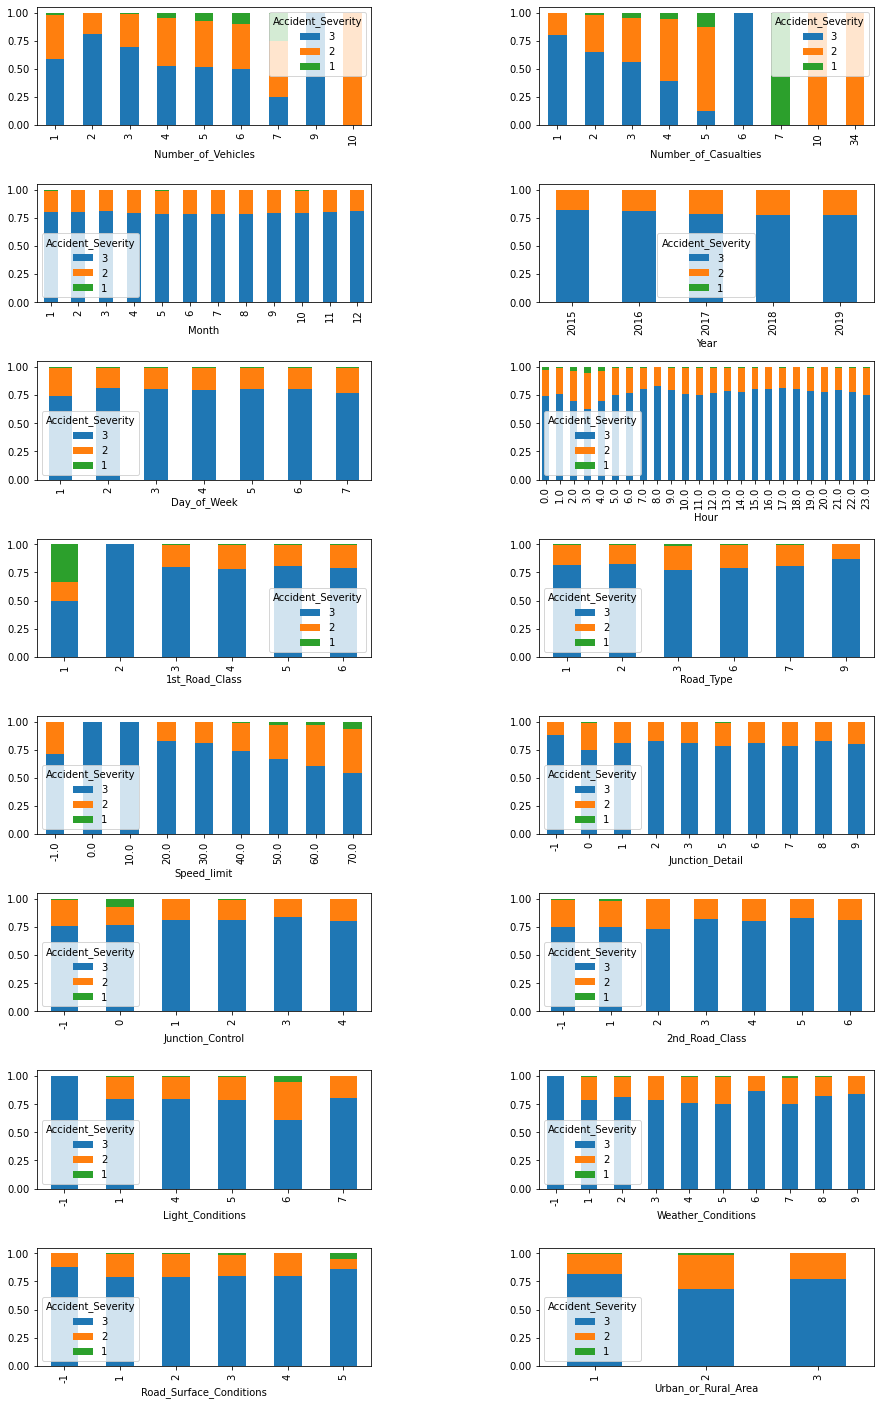

In [24]:
# Displays relative frequency stacked bar charts for accident severity
fig, axs = plt.subplots(8,2, figsize=(15,25))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
axs = axs.ravel()

for i in range(16):
    tab_list[i].plot(kind='bar', stacked=True, ax=axs[i])

In [ ]:
# Drops less useful columns
cyclist_accidents = cyclist_accidents.drop(columns=['Carriageway_Hazards', 'Special_Conditions_at_Site'])

In [ ]:
# Add in some variables from vehicles and casualties
# Look at accidents that involved a pedal cycle but the casualty was not a cyclist